In [3]:
"""
    CS231 assignment 1.
    K-Nearest Neighbour classifier.
"""
%pylab inline
import os
import time
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


In [7]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train) ,(X_test, y_test) = cifar10.load_data()

In [8]:
# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000, 1)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 1)


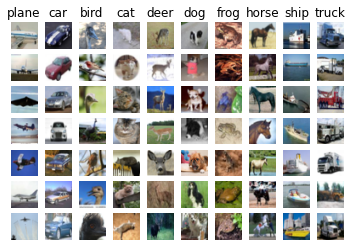

In [12]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [13]:
# Subsample the data for more efficient code execution in this exercise
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)



(5000, 3072) (500, 3072)


In [67]:
class KNN:
    def __init__(self):
        pass
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def calculate_dists_l2(self, X):
        """ 
        Calculate the l2 distances between X and X_train
        and store the distance between ith X and jth X_train at 
        dists[i][j].
        """
        num_test = X.shape[0]
        num_train = self.X_train.shape[0]
        dists = np.zeros((num_test, num_train))
        
    
    def predict(self, X, k=1):
        dists = self.calculate_dists_l2(X)
        pass

In [68]:
knn = KNN()
knn.train(X_train, y_train)

In [69]:
knn.predict(X_test)

ValueError: operands could not be broadcast together with shapes (5000,3072) (500,3072) 

In [122]:
a1 = np.array([[1, 2, 3], [3, 10, 20]])
a2 = np.array([[10, 10, 10], [20, 30, 40], [30, 30, 30], [30, 30, 30]])
a2ones = np.ones(a2.shape)
a1ones = np.ones(a1.shape)

a2ones.dot(a1.T)

array([[ 6., 33.],
       [ 6., 33.],
       [ 6., 33.],
       [ 6., 33.]])

In [120]:
dists = np.abs(a2ones.dot(a1.T) - a2.dot(a1ones.T))

In [121]:
dists

array([[24.,  3.],
       [84., 57.],
       [84., 57.],
       [84., 57.]])